In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pickle
import numpy as np

# Load the data
df = pd.read_csv("extended_songs.csv")

# Define the features to be normalized and the target feature   
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']

# Normalize the features
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Select the features for clustering
df_selected = df[features_to_normalize]

# Define the range of possible cluster numbers to try
cluster_numbers = range(2, 11)

# Initialize an empty list to store the models and their scores
models = []
scores = []

for k in cluster_numbers:
    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_selected)

    # Calculate and print the Silhouette Score for k clusters
    score = silhouette_score(df_selected, kmeans.labels_, metric='euclidean')
    print(f'Silhouette Score for {k} clusters: {score:.3f}')

    # Add the KMeans cluster membership with k clusters to the dataset
    df[f'kmeans{k}_cluster'] = kmeans.labels_

    # Save the KMeans model with k clusters
    pickle.dump(kmeans, open(f"kmeans{k}.pkl", "wb"))

    # Store the model and its score
    models.append(kmeans)
    scores.append(score)

# Sort the models and their scores by the scores in descending order
models, scores = zip(*sorted(zip(models, scores), key=lambda x: x[1], reverse=True))

# Apply PCA for 2D visualization
pca = PCA()
pca.fit(df_selected)
print(pca.explained_variance_ratio_)
print(pca.components_)
#df_pca = pd.DataFrame(pca.fit_transform(df_selected), columns=['PC1', 'PC2'])

#for i, model in enumerate(models):
#    # 3D scatter plot for the clusters
#    fig = plt.figure(figsize=(8, 6))
#    ax = fig.add_subplot(111, projection='3d')
#    scatter = ax.scatter(df['danceability'], df['energy'], df['speechiness'], c=df[f'kmeans{model.n_clusters}_cluster'], s=60)
#    ax.set_title(f'KMeans Clustering with {model.n_clusters} clusters (Silhouette Score: {scores[i]:.3f})')
#    ax.set_xlabel('Danceability')
#    ax.set_ylabel('Energy')
#    ax.set_zlabel('Speechiness')
#    plt.colorbar(scatter)
#    plt.show()
#
#    # 2D scatter plot for the clusters
#    plt.figure(figsize=(8, 6))
#    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df[f'kmeans{model.n_clusters}_cluster'], s=60)
#    plt.title(f'KMeans Clustering with {model.n_clusters} clusters (Silhouette Score: {scores[i]:.3f})')
#    plt.xlabel('PC1')
#    plt.ylabel('PC2')
#    plt.colorbar(scatter)
#    plt.show()

# Save the final dataset
#df.to_csv("final_dataset_test_2", index=False)


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.226


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.116


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.120


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.124


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.128


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.135


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.122


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.118


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.110
[0.21418097 0.10989512 0.09912311 0.09173838 0.08464781 0.08312205
 0.07568885 0.07392187 0.06612493 0.04830212 0.03483056 0.01842423]
[[-0.31185747 -0.5144692  -0.10890517  0.43891249  0.14459026 -0.04971613
  -0.32462492 -0.08417735 -0.15692096 -0.507645   -0.10203242  0.07055779]
 [-0.51381636  0.31104623 -0.46862059 -0.08102453  0.08146497  0.22610865
  -0.15997417  0.1132084  -0.2039539   0.28399311 -0.30281951  0.32086491]
 [-0.22966449  0.13466646  0.10550463 -0.12551422  0.502614    0.41829644
  -0.27350827  0.01830759  0.09192885 -0.02825986  0.40316094 -0.47719091]
 [ 0.02606589 -0.04318554  0.62618499 -0.11113162  0.14080213  0.24353737
  -0.10441329  0.51361825  0.03170247 -0.09790102 -0.40504666  0.25397582]
 [-0.07929003  0.02426885 -0.06497153  0.18345731 -0.12220456 -0.17122083
   0.20652335  0.66721133 -0.52705513  0.00602064  0.2940873  -0.24261525]
 [ 0.13867344 -0.00462785  0.09468625  0.2578187  -0.05896242  0.67619404
   0.4

### Steps now include all the features listed into the analysis 
### then do a DB scan , e.g. epsilon, Iterate check out every amount created for epsilon.

The Silhouette score of the model is:  0.51


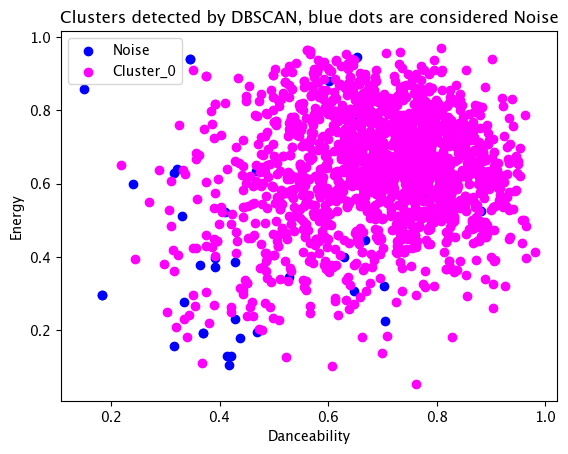

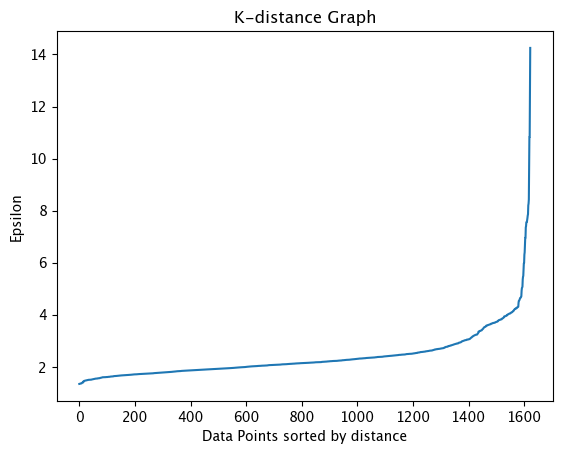

In [13]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Load the data
df = pd.read_csv("extended_songs.csv")

# Define the features to be normalized and the target feature   
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']

# Normalize the features
scaler = StandardScaler()
scaler.fit(df[features_to_normalize])
X_scaled_df = pd.DataFrame(scaler.transform(df[features_to_normalize]), columns=df[features_to_normalize].columns)

# Apply DBSCAN
model = DBSCAN(eps=4, min_samples=200)  # Adjust these values based on your data
 # You can adjust eps and min_samples parameters as per your requirement
yhat = model.fit_predict(X_scaled_df)

# Print silhouette score
print("The Silhouette score of the model is: ", round(silhouette_score(X_scaled_df, yhat), 2))

# Add cluster labels to the dataframe
df['cluster'] = yhat

# Retrieve unique clusters
clusters = np.unique(yhat)

# Create scatter plot for samples from each cluster
colors = ["b", "magenta", "green"]
for index, cluster in enumerate(list(clusters)):
    c_color = colors[index % len(colors)]  # Use modulo operator to prevent out-of-index error
    c_label = "Noise" if cluster == -1 else f"Cluster_{cluster}"
    plt.scatter(df[df['cluster'] == cluster]['danceability'], df[df['cluster'] == cluster]['energy'], color=c_color, label=c_label)

plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Compute the distance matrix between all the observations
d = distance_matrix(X_scaled_df, X_scaled_df)

# Fix the number of nearest neighbours k to MinPoints= 2*number_of_features
k = 2 * len(features_to_normalize)

# Get all the distances from each point to its k-nearest-neighbour
d2 = np.sort(d)[:, :k]

# Sort all those distances in descending order and plot those distances
plt.plot(np.sort(d2, axis=0)[:, -1])
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


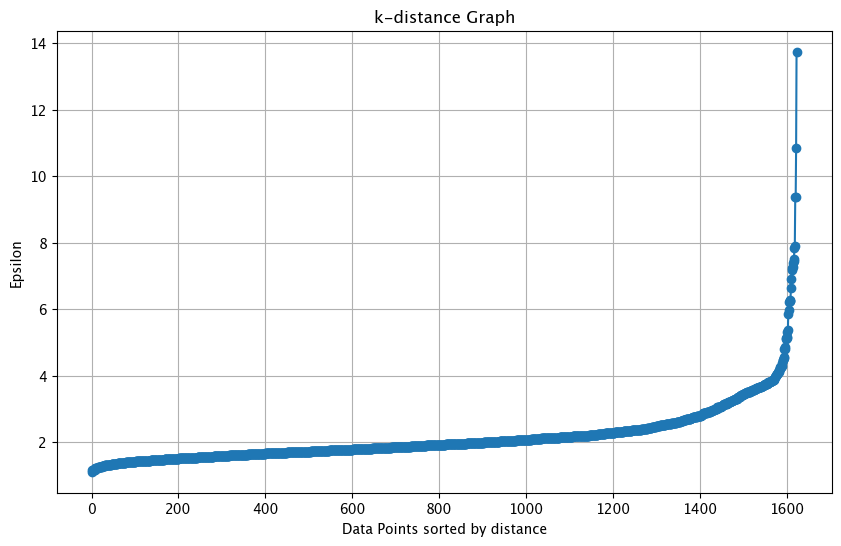

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pickle
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load the data
df = pd.read_csv("extended_songs.csv")

# Define the features to be normalized and the target feature   
features_to_normalize = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'loudness', 'key', 'mode']

# Normalize the features
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Select the features for clustering
df_selected = df[features_to_normalize]

# Define the range of possible cluster numbers to try
cluster_numbers = range(2, 11)

# Initialize an empty list to store the models and their scores
models = []
scores = []

# Define a function to calculate the distance to the kth nearest neighbor for each point
def knn_distances(X, k):
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    dist, _ = knn.kneighbors(X)
    return dist[:, -1]

# Set the number of neighbors
k = 13  # This is the min_samples value we chose

# Calculate the distance to the kth nearest neighbor for each point
distances = knn_distances(df_selected, k)

# Sort the distances
distances_sorted = np.sort(distances)

# Create a scatter plot of the distances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df)+1), distances_sorted, marker='o')
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()


In [58]:
# Make an array of possible epsilon values
epsilon_values = np.arange(2, 4.5, 0.1)

# Create a dictionary of models
models = {}

# Iterate over the epsilon values
for value in epsilon_values:
    # Create a DBSCAN model with the current epsilon value and min_samples = 2 * number of features
    model = DBSCAN(eps=value, min_samples=2*len(features_to_normalize))
    
    # Fit the model and predict the clusters
    yhat = model.fit_predict(df_selected)
    
    number_of_clusters = len([label for label in np.unique(model.labels_) if label != -1])
    print("The epsilon values is {} and the number of cluster is {}".format(value, number_of_clusters))
    
    # Save the models
    filename = "dbscan_"+str(round(value,2))+".pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    
    # Calculate the silhouette score
    score =  round(silhouette_score(df_selected, yhat), 2)
    
    # Add the model, predicted clusters and score to the models dictionary
    models["model_"+str(round(value, 2))] = {"model": model, "yhat": yhat, "score": score}


The epsilon values is 2.0 and the number of cluster is 2
The epsilon values is 2.1 and the number of cluster is 1
The epsilon values is 2.2 and the number of cluster is 1
The epsilon values is 2.3000000000000003 and the number of cluster is 1
The epsilon values is 2.4000000000000004 and the number of cluster is 1
The epsilon values is 2.5000000000000004 and the number of cluster is 1
The epsilon values is 2.6000000000000005 and the number of cluster is 1
The epsilon values is 2.7000000000000006 and the number of cluster is 1
The epsilon values is 2.8000000000000007 and the number of cluster is 1
The epsilon values is 2.900000000000001 and the number of cluster is 1
The epsilon values is 3.000000000000001 and the number of cluster is 1
The epsilon values is 3.100000000000001 and the number of cluster is 1
The epsilon values is 3.200000000000001 and the number of cluster is 1
The epsilon values is 3.300000000000001 and the number of cluster is 1
The epsilon values is 3.4000000000000012 a

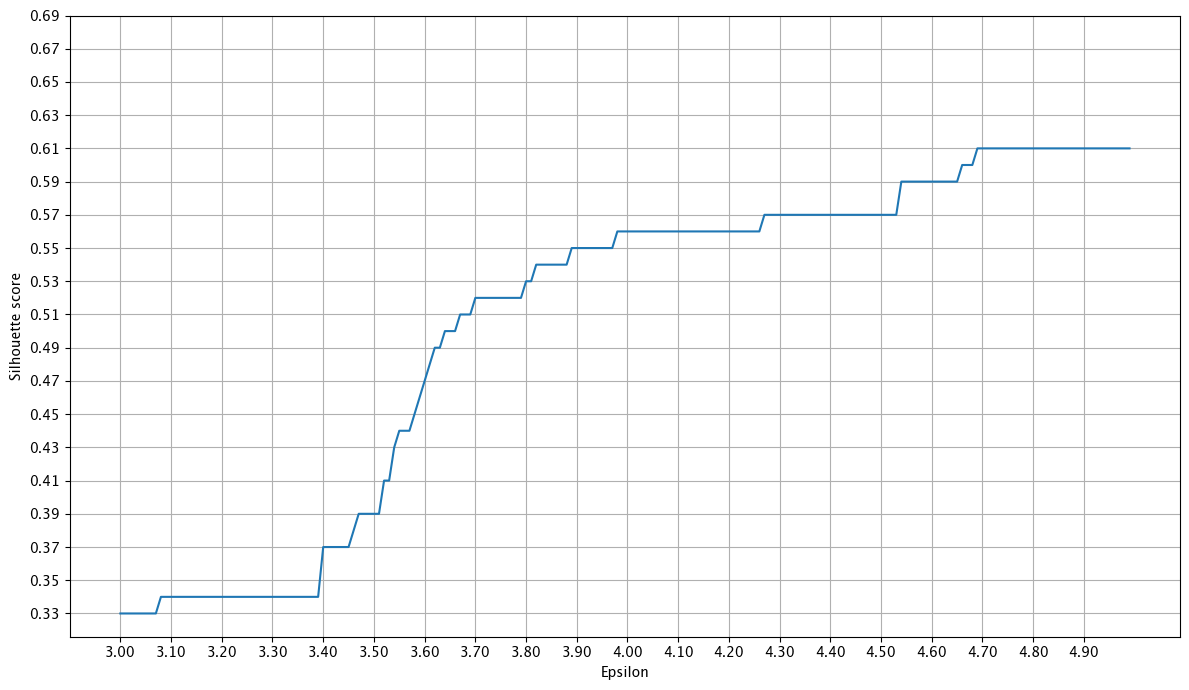

In [22]:
import matplotlib.ticker as ticker

# Get the epsilon values
epsilons = [round(value, 2) for value in epsilon_values]

# Get the silhouette scores
scores = [item[1]["score"] for item in list(models.items())]

# Create a plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()



In [24]:
# Filter the models
filtered_models = {key: value for key, value in models.items() if value['score'] > 4.7}

# Save the filtered models
pickle.dump(filtered_models, open("correct_models_filtered.pkl", "wb"))


In [48]:
%ls  dbscan_*

dbscan_3.0.pkl   dbscan_3.5.pkl   dbscan_4.0.pkl   dbscan_4.5.pkl
dbscan_3.01.pkl  dbscan_3.51.pkl  dbscan_4.01.pkl  dbscan_4.51.pkl
dbscan_3.02.pkl  dbscan_3.52.pkl  dbscan_4.02.pkl  dbscan_4.52.pkl
dbscan_3.03.pkl  dbscan_3.53.pkl  dbscan_4.03.pkl  dbscan_4.53.pkl
dbscan_3.04.pkl  dbscan_3.54.pkl  dbscan_4.04.pkl  dbscan_4.54.pkl
dbscan_3.05.pkl  dbscan_3.55.pkl  dbscan_4.05.pkl  dbscan_4.55.pkl
dbscan_3.06.pkl  dbscan_3.56.pkl  dbscan_4.06.pkl  dbscan_4.56.pkl
dbscan_3.07.pkl  dbscan_3.57.pkl  dbscan_4.07.pkl  dbscan_4.57.pkl
dbscan_3.08.pkl  dbscan_3.58.pkl  dbscan_4.08.pkl  dbscan_4.58.pkl
dbscan_3.09.pkl  dbscan_3.59.pkl  dbscan_4.09.pkl  dbscan_4.59.pkl
dbscan_3.1.pkl   dbscan_3.6.pkl   dbscan_4.1.pkl   dbscan_4.6.pkl
dbscan_3.11.pkl  dbscan_3.61.pkl  dbscan_4.11.pkl  dbscan_4.61.pkl
dbscan_3.12.pkl  dbscan_3.62.pkl  dbscan_4.12.pkl  dbscan_4.62.pkl
dbscan_3.13.pkl  dbscan_3.63.pkl  dbscan_4.13.pkl  dbscan_4.63.pkl
dbscan_3.14.pkl  dbscan_3.64.pkl  dbscan_4.14.pkl  dbscan_4.64.p

In [54]:
with open("dbscan_4.7.pkl", "rb") as file:
    best_model = pickle.load(file)

np.unique(best_model.labels_)

array([-1,  0])

In [ ]:
# 